# Anemia Exploratory Data Analysis

### Introduction
Anemia, a multifaceted medical condition, manifests when the body lacks a sufficient number of healthy red blood cells, which are vital for transporting oxygen to tissues throughout the body. This deficiency can result from various factors, leading to a diverse array of anemia types, each with its unique underlying causes and clinical presentations. 


### About the Dataset
* Gender: 0 - male, 1 - female
* Hemoglobin: Hemoglobin is a protein in your red blood cells that carries oxygen to your body's organs and tissues and transports carbon dioxide from your organs and tissues back to your lungs
* MCH: MCH is short for "mean corpuscular hemoglobin." It's the average amount in each of your red blood cells of a protein called hemoglobin, which carries oxygen around your body.
* MCHC: MCHC stands for mean corpuscular hemoglobin concentration. It's a measure of the average concentration of hemoglobin inside a single red blood cell.
* MCV: MCV stands for mean corpuscular volume. An MCV blood test measures the average size of your red blood cells.
Results: 0- not anemic, 1-anemic


# 1. EDA

#### Importing the necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import preprocessing

#### Loading Data

In [2]:
data=pd.read_csv('anemiaDATA.csv')

#### Let's visualize the data and see which features could be used

In [3]:
data.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [5]:
data.isnull().sum() #checking for total null values

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

#### Let's see how many people have anemia in the dataset. It will give an idea whether the data is balanced or imbalanced

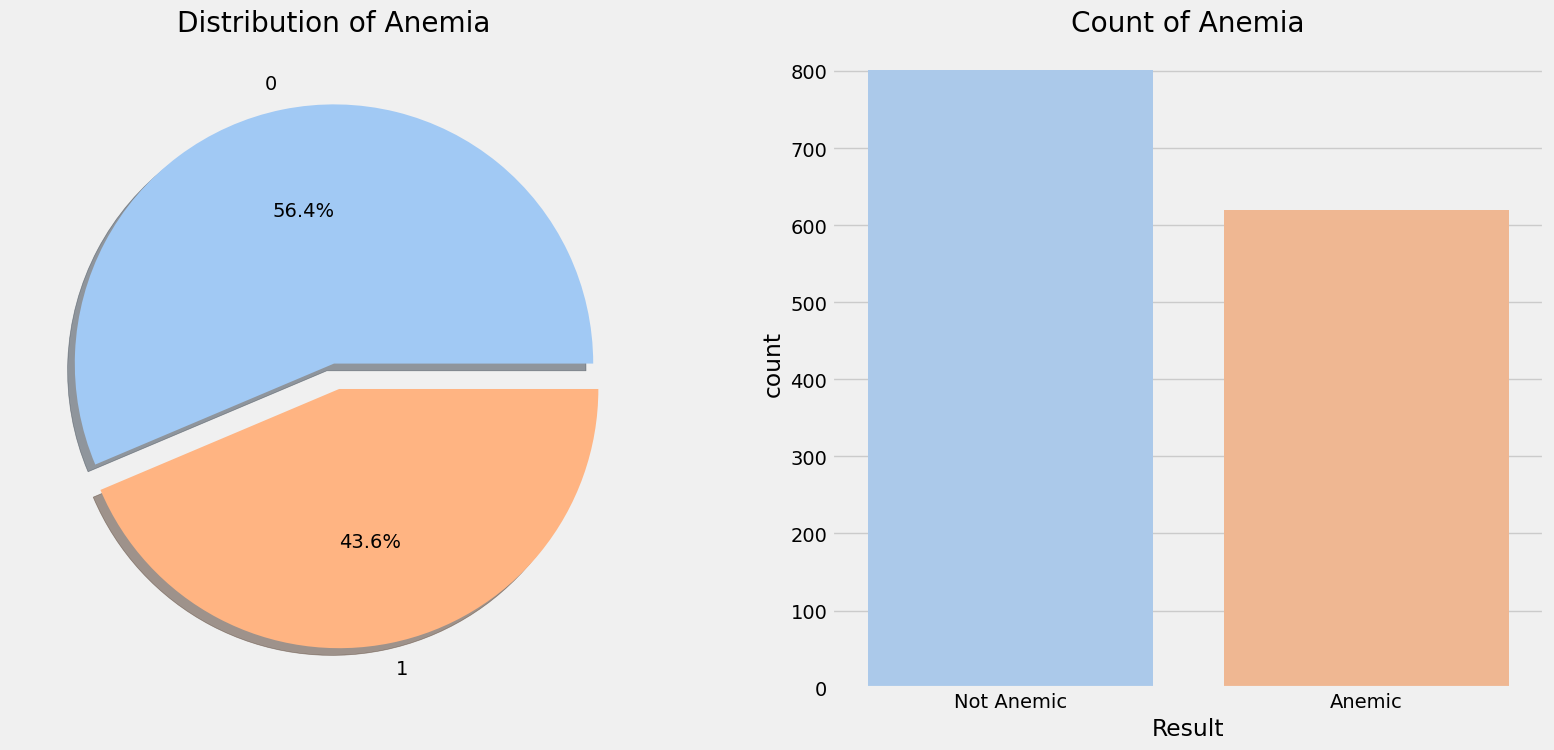

In [6]:
colors = sns.color_palette('pastel')


f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart showing distribution of 'Result'
data['Result'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True, colors=colors)
ax[0].set_title('Distribution of Anemia')
ax[0].set_ylabel('')  # Removing ylabel for better visualization

# Countplot showing count of 'Result' values
sns.countplot(x='Result', data=data, palette=colors, ax=ax[1])  # Changed 'Result' to x='Result'
ax[1].set_title('Count of Anemia')
ax[1].set_xticks([0, 1])  # Setting the x-ticks positions
ax[1].set_xticklabels(['Not Anemic', 'Anemic'])  # Setting the x-tick labels
plt.show()



### Categorical Feature: Gender

In [7]:
data.groupby(['Gender','Result'])['Result'].count()

Gender  Result
0       0         473
        1         208
1       0         328
        1         412
Name: Result, dtype: int64

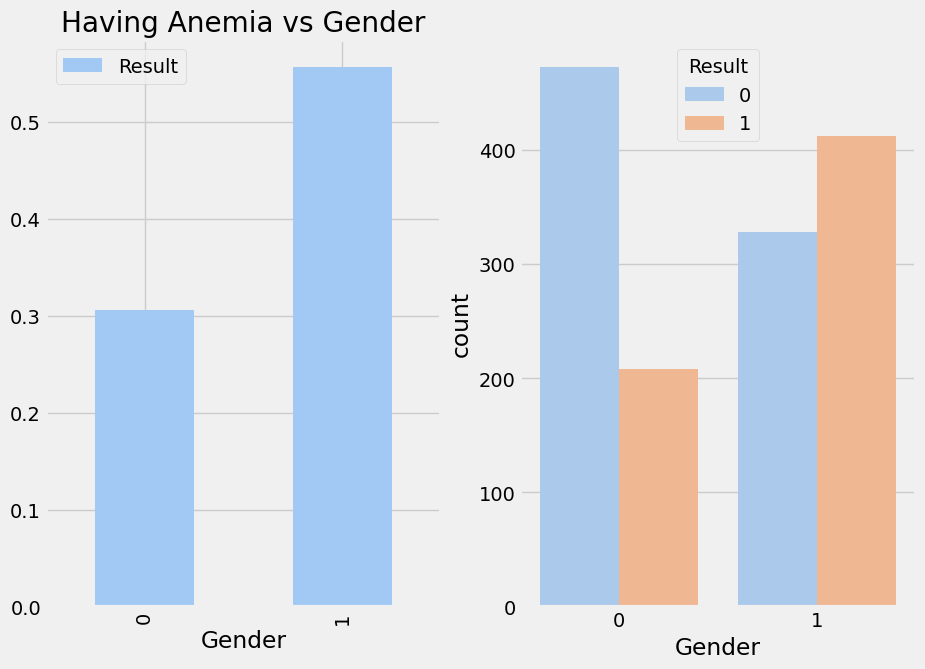

In [8]:
custom_palette = sns.color_palette('pastel')

fig, ax = plt.subplots(1, 2, figsize=(10, 7))

# Plotting mean of 'Result' grouped by 'Gender'
data[['Gender', 'Result']].groupby(['Gender']).mean().plot.bar(ax=ax[0], color=custom_palette)
ax[0].set_title('Having Anemia vs Gender')

# Plotting count of 'Gender' with different 'Result' values
sns.countplot(x='Gender', hue='Result', data=data, palette=custom_palette, ax=ax[1])


plt.show()


### Continious Feature: Hemoglobin

In [9]:
# See the min, max, mean values
print('The highest hemoglobin was of:',data['Hemoglobin'].max())
print('The lowest hemoglobin was of:',data['Hemoglobin'].min())
print('The average hemoglobin in the data:',data['Hemoglobin'].mean())

The highest hemoglobin was of: 16.9
The lowest hemoglobin was of: 6.6
The average hemoglobin in the data: 13.412737508796623


<div class="alert alert-block alert-info"> 📌 Lower than normal hemoglobin levels indicate anemia. The normal hemoglobin range is generally defined as 13.2 to 16.6 grams (g) of hemoglobin per deciliter (dL) of blood for men and 11.6 to 15 g/dL for women.</div>

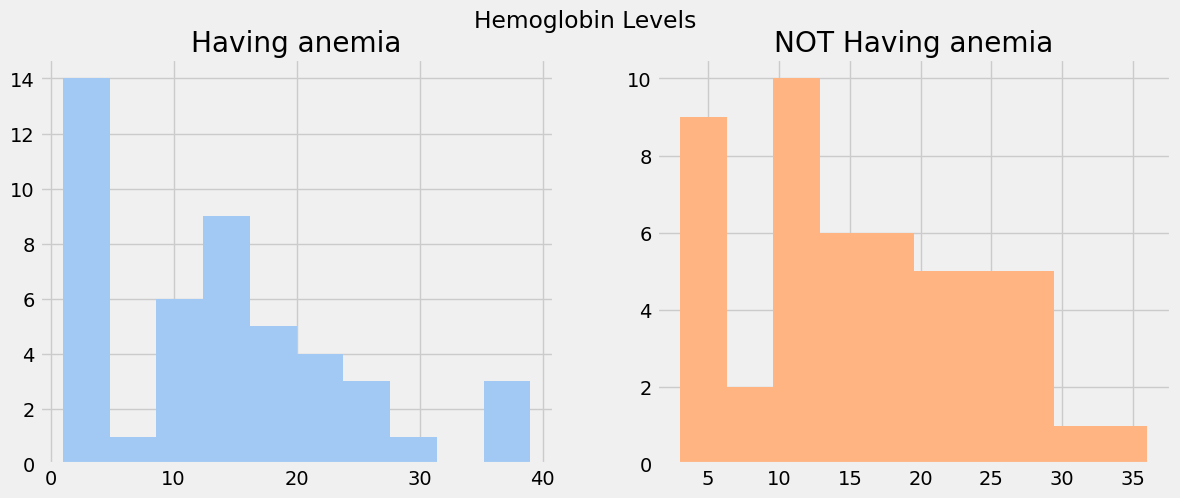

In [10]:

custom_palette = sns.color_palette('pastel')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

# Plot for "Having anemia"
data_len = data[data['Result'] == 1]['Hemoglobin'].value_counts()
ax1.hist(data_len, color=custom_palette[0])  # Using pastel color
ax1.set_title('Having anemia')

# Plot for "NOT Having anemia"
data_len = data[data['Result'] == 0]['Hemoglobin'].value_counts()
ax2.hist(data_len, color=custom_palette[1])  # Using pastel color
ax2.set_title('NOT Having anemia')

fig.suptitle('Hemoglobin Levels')
plt.show()


### Continious Feature: MCH (Mean Corpuscular Hemoglobin)

In [11]:
# See the min, max, mean values
print('The highest MCH was of:',data['MCH'].max())
print('The lowest MCH was of:',data['MCH'].min())
print('The average MCH in the data:',data['MCH'].mean())

The highest MCH was of: 30.0
The lowest MCH was of: 16.0
The average MCH in the data: 22.90562983814215


<div class="alert alert-block alert-info"> 📌 MCH stands for “mean corpuscular hemoglobin.” An MCH value refers to the average quantity of hemoglobin present in a single red blood cell. Hemoglobin is the protein in your red blood cells that transports oxygen to the tissues of your body</div>

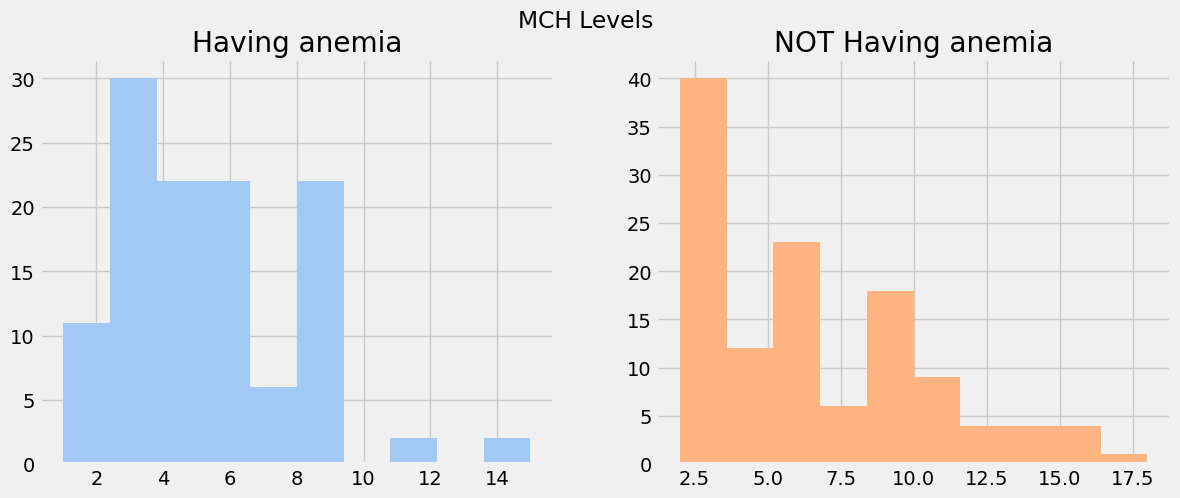

In [12]:
custom_palette = sns.color_palette('pastel')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

# Plot for "Having anemia"
data_len = data[data['Result'] == 1]['MCH'].value_counts()
ax1.hist(data_len, color=custom_palette[0])  # Using pastel color
ax1.set_title('Having anemia')

# Plot for "NOT Having anemia"
data_len = data[data['Result'] == 0]['MCH'].value_counts()
ax2.hist(data_len, color=custom_palette[1])  # Using pastel color
ax2.set_title('NOT Having anemia')

fig.suptitle('MCH Levels')
plt.show()

### Continious Feature: MCHC (Mean Corpuscular Hemoglobin Concentration)

In [13]:
# See the min, max, mean values
print('The highest MCHC was of:',data['MCHC'].max())
print('The lowest MCHC was of:',data['MCHC'].min())
print('The average MCHC in the data:',data['MCHC'].mean())

The highest MCHC was of: 32.5
The lowest MCHC was of: 27.8
The average MCHC in the data: 30.251231527093594


<div class="alert alert-block alert-info"> 📌 A similar measure to MCH is something doctors call "mean corpuscular hemoglobin concentration" (MCHC). MCHC checks the average amount of hemoglobin in a group of red blood cells.</div>

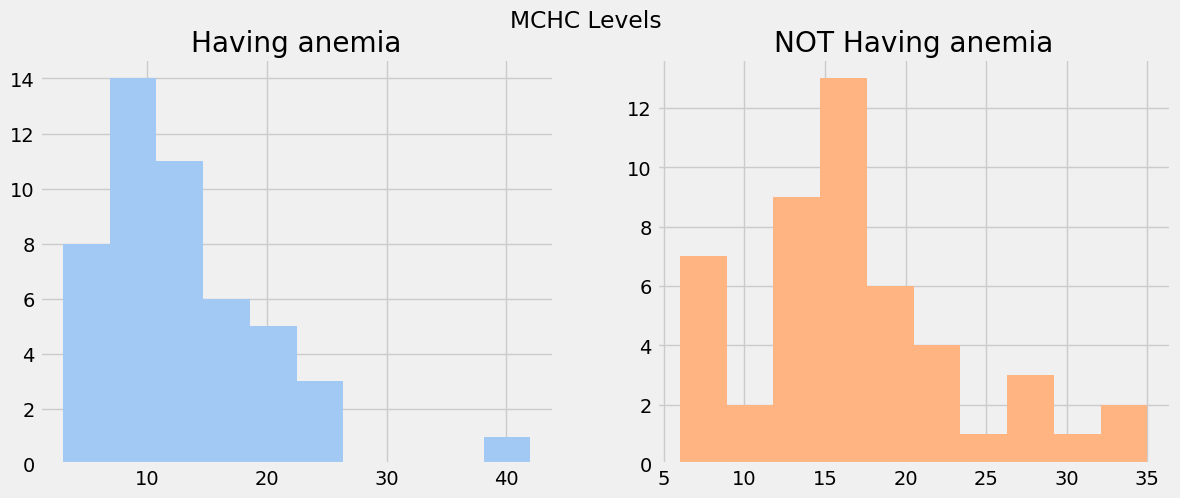

In [14]:

custom_palette = sns.color_palette('pastel')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

# Plot for "Having anemia"
data_len = data[data['Result'] == 1]['MCHC'].value_counts()
ax1.hist(data_len, color=custom_palette[0])  # Using pastel color
ax1.set_title('Having anemia')

# Plot for "NOT Having anemia"
data_len = data[data['Result'] == 0]['MCHC'].value_counts()
ax2.hist(data_len, color=custom_palette[1])  # Using pastel color
ax2.set_title('NOT Having anemia')

fig.suptitle('MCHC Levels')
plt.show()


### Continious Feature: MCV (Mean Corpuscular Volume)

In [15]:
# See the min, max, mean values
print('The highest MCV was of:',data['MCV'].max())
print('The lowest MCV was of:',data['MCV'].min())
print('The average MCV in the data:',data['MCV'].mean())

The highest MCV was of: 101.6
The lowest MCV was of: 69.4
The average MCV in the data: 85.5237860661506


<div class="alert alert-block alert-info"> 📌 Mean corpuscular volume (MCV) is a laboratory value that measures the average size and volume of a red blood cell. It has utility in helping determine the etiology of anemia — calculation of the value is by multiplying the percent hematocrit by ten divided by the erythrocyte count.</div>

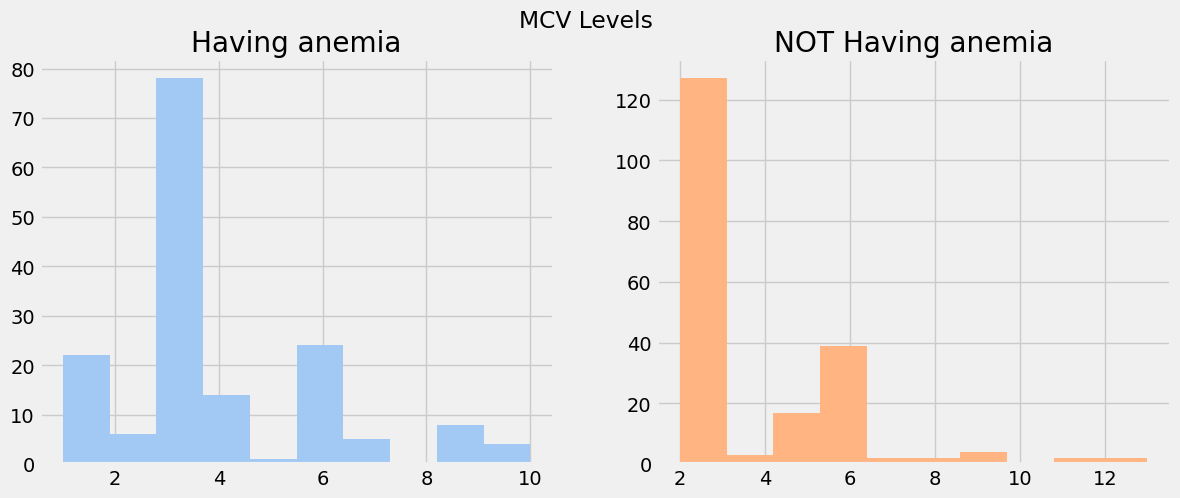

In [16]:

custom_palette = sns.color_palette('pastel')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

# Plot for "Having anemia"
data_len = data[data['Result'] == 1]['MCV'].value_counts()
ax1.hist(data_len, color=custom_palette[0])  # Using pastel color
ax1.set_title('Having anemia')

# Plot for "NOT Having anemia"
data_len = data[data['Result'] == 0]['MCV'].value_counts()
ax2.hist(data_len, color=custom_palette[1])  # Using pastel color
ax2.set_title('NOT Having anemia')

fig.suptitle('MCV Levels')
plt.show()


# 2. Feature Engineering and Data Cleaning

We need to convert the continous values into categorical values by either Binning or Normalisation. Binning and normalisation both will be used in this section i.e group a range of ages into a single bin or assign them a single value.

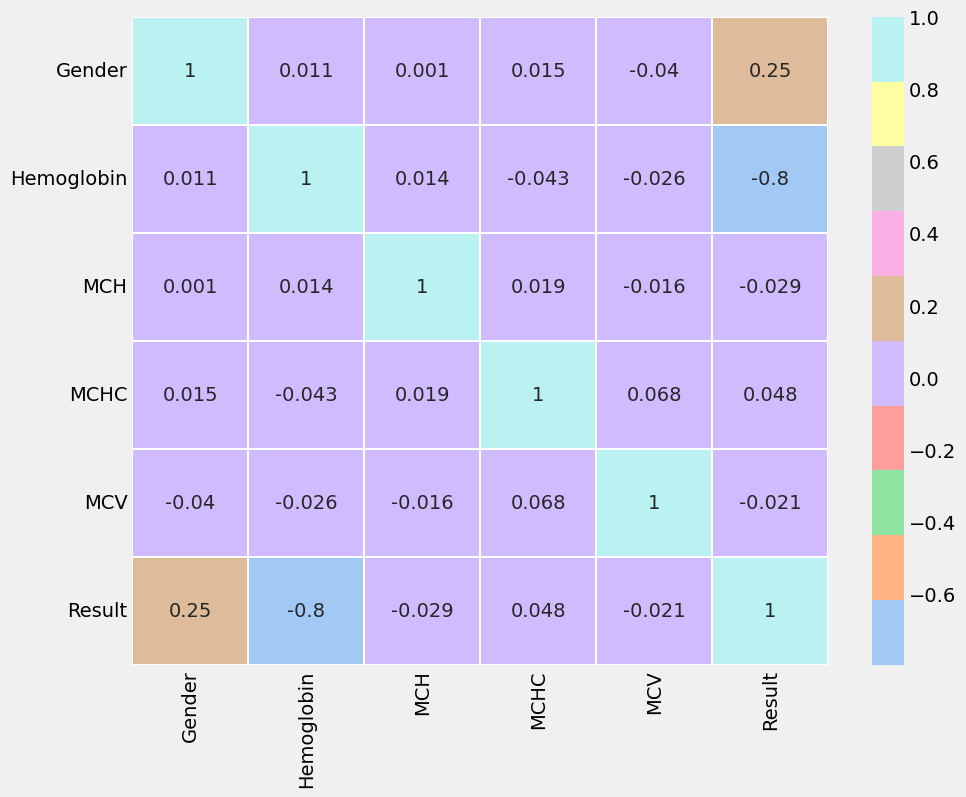

In [17]:
pastel_palette = sns.color_palette('pastel')
pastel_cmap = ListedColormap(pastel_palette.as_hex())

sns.heatmap(data.corr(), annot=True, cmap=pastel_cmap, linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

In [18]:
from sklearn import preprocessing
import pandas as pd

d = preprocessing.normalize(data.iloc[:,1:5], axis=0)
scaled_df = pd.DataFrame(d, columns=["Hemoglobin", "MCH", "MCHC", "MCV"])
scaled_df.head()

,Hemoglobin,MCH,MCHC,MCV
0,0.029155,0.025904,0.025491,0.025799
1,0.031112,0.028985,0.024790,0.022193
2,0.017611,0.024535,0.025929,0.021946
3,0.029155,0.018258,0.027506,0.026970
4,0.028764,0.025105,0.024703,0.030669
